# Data process of freeze synchrony
20220701 wi<BR>
    Small subset of scripts for daily analysis. They do not add figure, group, and simulation_id columns. 

In [1]:
import os
import traceback
import sys
sys.path.insert(1, r'W:\wataru\jupyter\synchro_freeze')
import numpy as np
import pandas as pd
import synchro_freeze as sf

path = r"W:\wataru\jupyter\synchro_freeze\20220331_BP_paper_simulation\sync_data"
path = r"W:\videos_synchrony"


# Definition of each dataframe
#
# Data types
#                     output                              input
#   bool              converted by str()                  bool as it is
#   int               converted by str()                  int64
#   float:            converted by str()                  float64
#   int_array:        converted by np.array2string()      object converted by np.fromstring
#   str:              as it is                            object as it is
#
#
# Computation pipeline
# 1. master table
columnName1 = ['folder_videoname',  'single_animal',    'video_system',     'video_total_frames',
              'fz_start_sub1',      'fz_end_sub1',      'fz_start_sub2',    'fz_end_sub2']
columnType1 = ['str',               'bool',             'str',              'int',
              'int_array',          'int_array',        'int_array',        'int_array']
# # 1a. add group information
# columnName1a = np.append(columnName1, ['figure', 'group', 'simulation_id'])
# columnType1a = np.append(columnType1, ['str',    'str',   'str'])

# 2. compute % freezing, etc.
columnName2 = np.append(columnName1, ['fz_sub1',       'fz_sub2',            'fz_overlap',       'fz_sub1_bout_dur_ave',
                                      'fz_sub1_bout_n','fz_sub2_bout_dur_ave','fz_sub2_bout_n'])
columnType2 = np.append(columnType1, ['float',         'float',              'float',            'float',               
                                      'int',           'float',              'int'])

# 3. compute Cohen's D
columnName3 = np.append(columnName2, ['cohen_d'])
columnType3 = np.append(columnType2, ['float'])

# 4. Markov chain analysis
columnName4 = np.append(columnName3, ['s_count_0',   's_count_1',   's_count_2',   's_count_3',
                                      'st_count_00', 'st_count_01', 'st_count_02', 'st_count_03',
                                      'st_count_10', 'st_count_11', 'st_count_12', 'st_count_13',
                                      'st_count_20', 'st_count_21', 'st_count_22', 'st_count_23',
                                      'st_count_30', 'st_count_31', 'st_count_32', 'st_count_33'])
columnType4 = np.append(columnType3, ['int',         'int',         'int',         'int',
                                      'int',         'int',         'int',         'int',
                                      'int',         'int',         'int',         'int',
                                      'int',         'int',         'int',         'int',
                                      'int',         'int',         'int',         'int'])

# Statistical analysis
columnName5 = np.append(columnName3, ['simulation_id','Freeze_High_sub','Freeze_Low_sub','Freeze_difference', 'Freeze_ave'])
columnType5 = np.append(columnType3, ['str',          'float',          'float',         'float',             'float'])

columnName6 = np.append(columnName5, ['Freeze_collapsed'])
columnType6 = np.append(columnType5, ['float'])

columnName7 = ['folder_videoname',
            'high_sub_r','high_sub_p',
            'low_sub_r','low_sub_p',
            'freeze_ave_r','freeze_ave_p',
            'freeze_diff_r','freeze_diff_p',
            'high_sub_bout_dur_ave_r','high_sub_bout_dur_ave_p',
            'low_sub_bout_dur_ave_r','low_sub_bout_dur_ave_p',
            'high_sub_bout_n_r','high_sub_bout_n_p',
            'low_sub_bout_n_r','low_sub_bout_n_p']

columnType7 = ['str', 'float','float','float','float','float','float','float','float',
              'float','float','float','float','float','float','float','float']    

---
# Step1. General processes

### 1. Read the original [video_file_name].csv file to generate summary.csv

In [2]:
##############################################
# Step 1. Create master summary.csv file
#   Read the input CSV file containing epoch onset and offset from two subjects
#   Create Pandas DataFrame
#   Output summary.csv as default
# The format of the pandas dataframe and output csv is specified by colunName and columnType
##############################################
sf.create_master_table(path, columnName1, columnType1, output_file='summary1.csv')

	Processing directory:  20211203,  20220106,  20220107,  20220120,  20220121,  20220204,  20220206,  20220217,  20220220,  20220316,  20220318,  20220321,  20220327,  20220329,  20220331,  20220404,  20220406,  20220408,  20220506,  20220508,  20220513,  20220515,  20220521,  20220523,  20220524,  20220526,  completed.
	Writing summary1.csv.


**Display freezing overlap in specific experiment**
Resulting figure will be output as overlap_fig.eps

In [3]:
_df = sf.read_csv2pd(path, 'summary1.csv', columnName1, columnType1)

print("We found the following Foldername_videoname.")
print("Total subject #: ", len(_df))
print("\nSelect the Foldername_videoname ID number and run the next cell")

We found the following Foldername_videoname.
Total subject #:  191

Select the Foldername_videoname ID number and run the next cell


Folder name: 20220508_f227_1
Animal1 freeze : 5.208333
Animal2 freeze : 1.041667
Overlap freeze : 0.000000


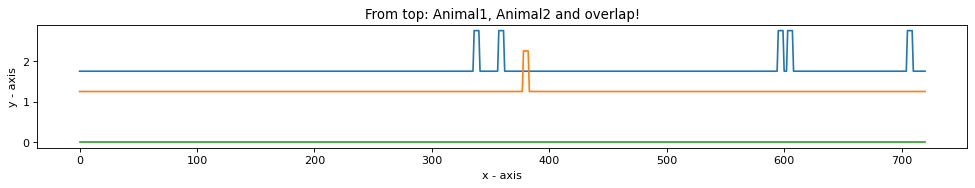

In [4]:
folderID = 135
output = True

(a,b,c,d) = sf.overlap_freezing(_df.iloc[folderID,:], path, output)

### 2. Compute %freezing, %overlap, freeze bout, the averaged duration
Warning appears if members of dyads show 0 freezing.

In [5]:
#############################################
# Step 2. Compute % epoch time and add the summary
#   Read summary.csv as default
#   Compute % freezing and store in DF
#   Output to summary1.csv as default
# Add the three columns, as indicated with columnName and columnType
#############################################
warr_lines = sf.compute_epoch_percent3(path, columnName2, columnType2, input_file='summary1.csv', output_file='summary2.csv')

	Processing:   0 / 191, Raised!  ## 175 20220524_m380 ## Raised!  ## 177 20220524_m382 ## Raised!  ## 178 20220524_m383 ## Raised!  ## 179 20220524_m384 ## Raised!  ## 180 20220524_m385 ## Raised!  ## 181 20220524_m386 ## Raised!  ## 182 20220524_m387 ## Raised!  ## 185 20220526_m382_1 ## Raised!  ## 186 20220526_m383_1 ## Raised!  ## 187 20220526_m384_1 ## Raised!  ## 188 20220526_m385_1 ## Raised!  ## 189 20220526_m386_1 ## 	Writing summary2.csv.


**Drop dyads of either member with zero freezing**<BR>
summary2_dropped.csv: dyads with zero freezing members.<BR>
summary2_extracted.csv: dyads without zero freezing members.<BR>

In [6]:
# Read summary1.csv
input_file = 'summary2.csv'
df = sf.read_csv2pd(path, input_file, columnName2, columnType2)

# drop=True: remove the old index
# No warring simulation
_df1 = df[~df['folder_videoname'].isin(warr_lines)].reset_index(drop=True)
# with warring simulation
_df2 = df[df['folder_videoname'].isin(warr_lines)].reset_index(drop=True)

base, ext = os.path.splitext(input_file)
output_file1 = base + '_extracted' + ext
output_file2 = base + '_dropped' + ext

sf.write_pd2csv(path, output_file1, _df1, columnName2, columnType2, 1000)
sf.write_pd2csv(path, output_file2, _df2, columnName2, columnType2, 1000)

### 3. Compute Cohen_D (Single processing version)

In [7]:
#############################################
# Step 4. Compute Cohen_D
#   Read summary1.csv
#   Compute permutation/Cohen_D and store in DF
#   Output to summary2.csv
#############################################
sf.compute_cohen_d(path, columnName3, columnType3, input_file='summary2_extracted.csv', output_file='summary3.csv')

	Processing column:  0/179,  completed.
	Writing summary3.csv.


### 4. Markov chain analysis

In [8]:
#############################################
# Step 4. Markov analysis
#   Read summary2.csv as default
#   Count behavioral state & transitions for Markov chain analysis
#   Output to summary3.csv as default
#############################################
sf.compute_markov_chain(path, columnName4, columnType4, input_file='summary3.csv', output_file='summary4.csv')

	Processing column:  0/179,  1/179,  2/179,  3/179,  4/179,  5/179,  6/179,  7/179,  8/179,  9/179,  10/179,  11/179,  12/179,  13/179,  14/179,  15/179,  16/179,  17/179,  18/179,  19/179,  20/179,  21/179,  22/179,  23/179,  24/179,  25/179,  26/179,  27/179,  28/179,  29/179,  30/179,  31/179,  32/179,  33/179,  34/179,  35/179,  36/179,  37/179,  38/179,  39/179,  40/179,  41/179,  42/179,  43/179,  44/179,  45/179,  46/179,  47/179,  48/179,  49/179,  50/179,  51/179,  52/179,  53/179,  54/179,  55/179,  56/179,  57/179,  58/179,  59/179,  60/179,  61/179,  62/179,  63/179,  64/179,  65/179,  66/179,  67/179,  68/179,  69/179,  70/179,  71/179,  72/179,  73/179,  74/179,  75/179,  76/179,  77/179,  78/179,  79/179,  80/179,  81/179,  82/179,  83/179,  84/179,  85/179,  86/179,  87/179,  88/179,  89/179,  90/179,  91/179,  92/179,  93/179,  94/179,  95/179,  96/179,  97/179,  98/179,  99/179,  100/179,  101/179,  102/179,  103/179,  104/179,  105/179,  106/179,  107/179,  108/179, 

### End of process
---